In [1]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('messages.csv')

In [3]:
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [4]:
df.describe()

,label
count,2893.000000
mean,0.166263
std,0.372381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
subject    2831 non-null object
message    2893 non-null object
label      2893 non-null int64
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [6]:
ham = df[df['label']==0]
spam = df[df['label']==1]

In [7]:
ham

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2883,evolvable hardware and gp,"paper now available in post script . . . "" rap...",0
2885,british vs . american < a > ( s,griffin bacal internet mail direct inquiries t...,0
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [8]:
spam

,subject,message,label
21,free,this is a multi-part message in mime format . ...,1
38,the internet success toolbox,note : we do not wish to send e-mail to anyone...,1
84,free stealth 3 . 0 bulk email software . . .,"just released . . . 30 , 000 , 000 email addre...",1
85,need more money ?,"hi , would you like to earn an extra $ 700 a w...",1
86,cable decsrambler now only $ 6 . 99 !,this is really cool ! premium channels and pay...,1
...,...,...,...
2884,did that work for you ? - calsvxtn,hello thanks for stopping by ! ! we have taken...,1
2886,"from fanny , recommending nek","dear sir or madam , this is not a "" spam "" mes...",1
2887,win $ 300usd and a cruise !,"raquel 's casino , inc . is awarding a cruise ...",1
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1


In [9]:
print( 'Spam percentage =', (len(spam) / len(df) )*100,"%")

Spam percentage = 16.626339440027653 %


In [10]:
print( 'Ham percentage =', (len(ham) / len(df) )*100,"%")

Ham percentage = 83.37366055997235 %


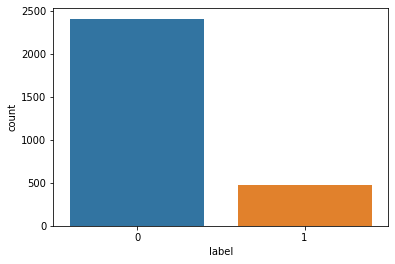

In [11]:
sns.countplot(df['label'], label = "Count")

In [12]:
df['length']=df['message'].apply(len)

In [13]:
df.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


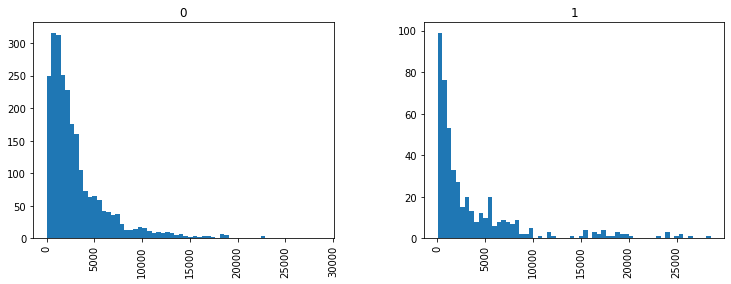

In [14]:
df.hist(column='length',by='label',bins=60,figsize=(12,4));

In [15]:
df_ham  = df[df['label'] == 0].copy()
df_spam = df[df['label'] == 1].copy()

In [16]:
import wordcloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

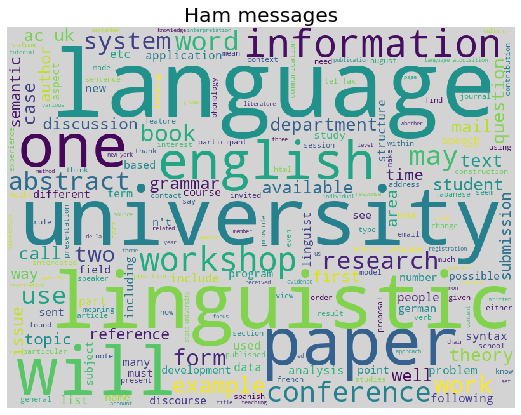

In [17]:
show_wordcloud(df_ham, "Ham messages")

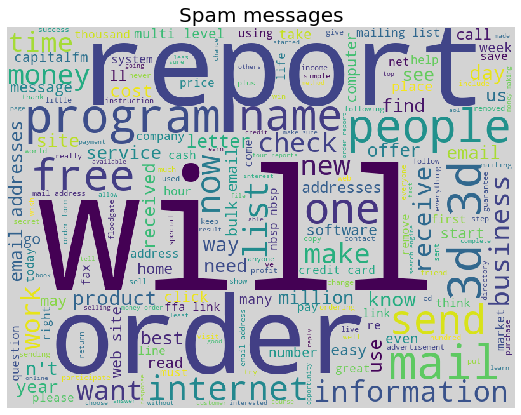

In [18]:
show_wordcloud(df_spam, "Spam messages")

In [19]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def remove_punctuation_and_stopwords(msg):
    
    remove_punctuation = [ch for ch in msg if ch not in string.punctuation]
    remove_punctuation = "".join(remove_punctuation).split()
    
    remove_punctuation_stopwords = \
        [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words("english")]
        
    return remove_punctuation_stopwords

In [22]:
df['message'].apply(remove_punctuation_and_stopwords).head()

0    [content, length, 3386, appleiss, research, ce...
1    [lang, classification, grimes, joseph, e, barb...
2    [posting, inquiry, sergei, atamas, satamas, um...
3    [colleague, researching, differing, degrees, r...
4    [earlier, morning, phone, friend, mine, living...
Name: message, dtype: object

In [23]:
from collections import Counter

In [24]:
df_ham.loc[:, 'message'] = df_ham['message'].apply(remove_punctuation_and_stopwords)
words_data_ham = df_ham['message'].tolist()
df_spam.loc[:, 'message'] = df_spam['message'].apply(remove_punctuation_and_stopwords)
words_data_spam = df_spam['message'].tolist()

In [25]:
list_ham_words = []
for sublist in words_data_ham:
    for item in sublist:
        list_ham_words.append(item)

In [26]:
list_spam_words = []
for sublist in words_data_spam:
    for item in sublist:
        list_spam_words.append(item)

In [27]:
c_ham  = Counter(list_ham_words)
c_spam = Counter(list_spam_words)
df_hamwords_top30  = pd.DataFrame(c_ham.most_common(30),  columns=['word', 'count'])
df_spamwords_top30 = pd.DataFrame(c_spam.most_common(30), columns=['word', 'count'])

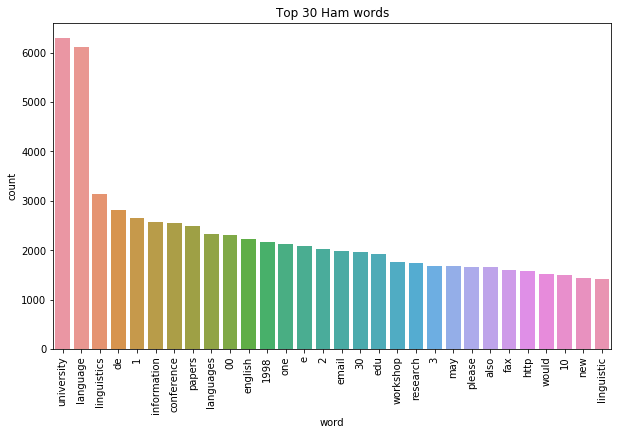

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_hamwords_top30, ax=ax)
plt.title("Top 30 Ham words")
plt.xticks(rotation='vertical');

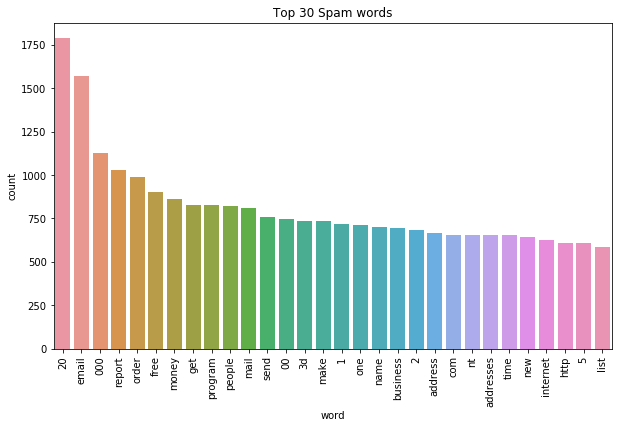

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_spamwords_top30, ax=ax)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical');

In [30]:
df=df.drop(["subject"],axis=1)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size = 0.22, random_state = 42)

In [32]:
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  2256
X_test:  637
y_train:  2256
y_test:  637


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(df['message'])

In [34]:
X_train_cv = cv.transform(X_train)
X_train_cv

<2256x64661 sparse matrix of type '<class 'numpy.int64'>'
	with 426535 stored elements in Compressed Sparse Row format>

In [35]:
X_test_cv = cv.transform(X_test)
X_test_cv

<637x64661 sparse matrix of type '<class 'numpy.int64'>'
	with 118781 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_cv,y_train)

y_mnb = mnb.predict(X_test_cv)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Naive Bayes Classifier Accuracy: ', accuracy_score(y_test,y_mnb))
print('Naive Bayes Classifier confusion_matrix: ', confusion_matrix(y_test,y_mnb))
print('Naive Bayes Classifier classification report: \n', classification_report(y_test,y_mnb))

Naive Bayes Classifier Accuracy:  0.9921507064364207
Naive Bayes Classifier confusion_matrix:  [[509   3]
 [  2 123]]
Naive Bayes Classifier classification report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       512
           1       0.98      0.98      0.98       125

    accuracy                           0.99       637
   macro avg       0.99      0.99      0.99       637
weighted avg       0.99      0.99      0.99       637



In [50]:
#Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_cv,y_train)
y_dtc = dtc.predict(X_test_cv)

In [51]:
print('Decision Tree Classifier Accuracy: ',accuracy_score(y_test,y_dtc))
print('Decision Tree Classifier confusion_matrix: ', confusion_matrix(y_test,y_dtc))
print('Decision Tree Classifier classification report: \n', classification_report(y_test,y_dtc))

Decision Tree Classifier Accuracy:  0.9623233908948194
Decision Tree Classifier confusion_matrix:  [[505   7]
 [ 17 108]]
Decision Tree Classifier classification report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       512
           1       0.94      0.86      0.90       125

    accuracy                           0.96       637
   macro avg       0.95      0.93      0.94       637
weighted avg       0.96      0.96      0.96       637



In [52]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_cv,y_train)
y_rfc = rfc.predict(X_test_cv)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [53]:
print('Random Forest Classifier Accuracy_score: ',accuracy_score(y_test,y_rfc))
print('Random Forest Classifier confusion_matrix: ', confusion_matrix( y_test,y_rfc))
print('Random Forest Classifier classification report: \n ',classification_report( y_test,y_rfc))

Random Forest Classifier Accuracy_score:  0.9466248037676609
Random Forest Classifier confusion_matrix:  [[512   0]
 [ 34  91]]
Random Forest Classifier classification report: 
                precision    recall  f1-score   support

           0       0.94      1.00      0.97       512
           1       1.00      0.73      0.84       125

    accuracy                           0.95       637
   macro avg       0.97      0.86      0.91       637
weighted avg       0.95      0.95      0.94       637



In [54]:
#KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_cv,y_train)

y_knn = knn.predict(X_test_cv)

In [55]:
print('KNeighbors Classifier Accuracy_score: ',accuracy_score(y_test,y_knn))
print('KNeighbors Classifier confusion_matrix: ', confusion_matrix(y_test, y_knn))
print('KNeighbors Classifier classification report: \n ',classification_report(y_test,y_knn))

KNeighbors Classifier Accuracy_score:  0.858712715855573
KNeighbors Classifier confusion_matrix:  [[512   0]
 [ 90  35]]
KNeighbors Classifier classification report: 
                precision    recall  f1-score   support

           0       0.85      1.00      0.92       512
           1       1.00      0.28      0.44       125

    accuracy                           0.86       637
   macro avg       0.93      0.64      0.68       637
weighted avg       0.88      0.86      0.82       637



In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [59]:
y_pred_prob=mnb.predict_proba(X_test_cv)[:,-1]
y_pred_prob

array([5.41196764e-134, 2.14378707e-282, 1.00000000e+000, 1.32432032e-048,
       0.00000000e+000, 2.04179696e-123, 6.14817790e-110, 1.00000000e+000,
       6.48981650e-054, 3.34594105e-128, 6.63864022e-026, 2.57312783e-287,
       1.00000000e+000, 2.94493750e-217, 0.00000000e+000, 4.00246780e-080,
       1.20559092e-109, 6.51373773e-159, 1.00000000e+000, 4.64436220e-096,
       1.00000000e+000, 1.00000000e+000, 4.42081242e-079, 1.18888772e-023,
       3.01811719e-108, 2.86463439e-259, 6.10591508e-031, 2.63626992e-212,
       8.29405454e-117, 0.00000000e+000, 1.00290270e-074, 1.00000000e+000,
       2.90686853e-044, 3.52003978e-072, 3.60076835e-078, 5.74902808e-048,
       5.16884243e-043, 0.00000000e+000, 4.72339348e-117, 4.40802179e-024,
       1.00000000e+000, 1.30555052e-038, 7.01433935e-074, 2.73470527e-133,
       1.00000000e+000, 2.62348529e-025, 0.00000000e+000, 1.18932951e-002,
       1.08379871e-055, 1.00000000e+000, 1.42760461e-122, 1.84038320e-051,
       1.00000000e+000, 5

In [60]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

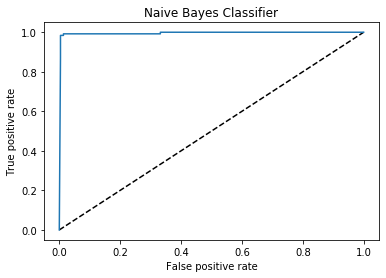

In [61]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Naive Bayes Classifier')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Naive Bayes Classifier")
plt.show()